**Algoritmos de aprendizaje por refuerzo (RL) Q-Learning.**

El problema que queremos resolver es el de encontrar el camino que nos suponga una mayor recompensa (el más corto) desde un estado inicial [0,0] hasta el estado final [4,4] pudiendo realizar 4 tipos de acciones como se indica en la gráfica.

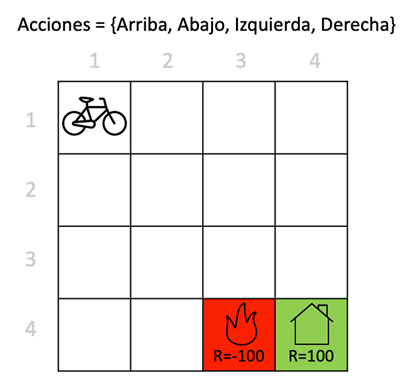

El programa basado en Algoritmos de aprendizaje por refuerzo (RL) Q-Learning, propone que el Agente aprenda el recorrido en un máximo de 10 partidas o recorridos hasta alcanzar el óptimo (con la menor cantidad de pasos) y con la recompensa máxima.

Q-learning es una técnica de aprendizaje por refuerzo que tiene como objetivo aprender una estrategia que le diga a un agente qué acción tomar bajo qué circunstancias.

•	En este algoritmo podemos observar los siguiente:

1.	El agente se ejecutará un número determinado de veces (recorridos o episodios).

2.	Cada vez que se ejecute, el agente partirá del estado inicial S por lo que hay que inicializar el entorno.

3.	Para cada ejecución, el agente calculará los valores de las acciones que puede tomar en cada uno de los estados con la Q-Function y actualizará el valor Q(s,a) en la Q-Table.

4.	El agente en cada estado puede realizar las acciones de dos formar:
•	Explorando: Selecciona una acción al azar.
•	Explotando: Selecciona la mejor acción entre todas las posibles.

5.	El algoritmo se ejecuta hasta que el agente llegue al estado final.

•	Para determinar si el agente tiene que explorar o explotar en un determinado estado se define un parámetro conocido como "greedy control" que no es más que la definición de una probabilidad de explotación o exploración; por ejemplo, si definimos (0.1) un 10% de las veces exploraremos y un 90% de las veces explotaremos el conocimiento adquirido por el sistema.

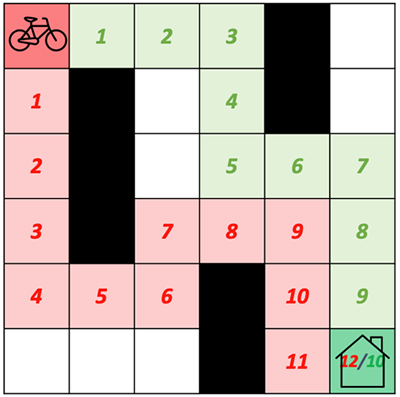

**Importación de librerías y dependencias.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Inicialización:**

Crear un entorno representado por una cuadrícula (matriz).

Inicializar la Q-Table (tabla Q) que almacenará los valores Q para cada par de estado y acción.

Definir los parámetros del algoritmo Q-Learning.

- alpha (tasa de aprendizaje): cuán rápido el agente aprende nuevos valores.

- gamma (factor de descuento): importancia de las futuras recompensas.

- epsilon (tasa de exploración): control de exploración frente a explotación.

In [2]:
# Parámetros del algoritmo Q-Learning
alpha = 0.7        # Tasa de aprendizaje
gamma = 0.8        # Factor de descuento
epsilon = 0.1      # Tasa de exploración
episodes = 10      # Número máximo de episodios
max_steps = 50     # Máximo número de pasos por episodio

# Configuración del entorno (matriz 5x5)
n_rows, n_cols = 5, 5
rewards = np.full((n_rows, n_cols), -1)  # Recompensa por defecto
rewards[4, 4] = 100  # Recompensa por llegar al objetivo

# Acciones: [arriba, abajo, izquierda, derecha]
actions = ['arriba', 'abajo', 'izquierda', 'derecha']

# Inicializar Q-Table
q_table = np.zeros((n_rows, n_cols, len(actions)))

Entrenamiento:

Durante un número máximo de episodios (partidas), el agente partirá desde el estado inicial.

En cada paso, decidirá si explorar (seleccionando una acción aleatoria) o explotar (eligiendo la mejor acción conocida según la tabla Q).

Actualizará la tabla Q en función de la recompensa obtenida tras tomar una acción.

Al llegar al estado final, registraremos el número de pasos y la recompensa total.

In [3]:


# Función para obtener el próximo estado basado en la acción
def next_state(state, action):
    i, j = state
    if action == 'arriba' and i > 0:
        return (i-1, j)
    elif action == 'abajo' and i < n_rows-1:
        return (i+1, j)
    elif action == 'izquierda' and j > 0:
        return (i, j-1)
    elif action == 'derecha' and j < n_cols-1:
        return (i, j+1)
    return state

# Función para seleccionar la acción (exploración o explotación)
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)  # Explorar
    else:
        state_idx = (state[0], state[1])
        return actions[np.argmax(q_table[state_idx])]  # Explotar

# Entrenamiento del agente
best_episode = None
best_steps = float('inf')
best_reward = float('-inf')

for episode in range(episodes):
    state = (0, 0)  # Estado inicial
    total_reward = 0
    steps = 0

    for _ in range(max_steps):
        action = choose_action(state)
        next_s = next_state(state, action)
        reward = rewards[next_s]
        action_idx = actions.index(action)

        # Actualizar Q-Table con la fórmula de Bellman
        old_value = q_table[state][action_idx]
        next_max = np.max(q_table[next_s])
        q_table[state][action_idx] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_s
        total_reward += reward
        steps += 1

        # Si alcanza el objetivo
        if state == (4, 4):
            break

    # Guardar el mejor recorrido
    if total_reward > best_reward:
        best_reward = total_reward
        best_steps = steps
        best_episode = episode + 1

    print(f"Recorrido (episodio) {episode + 1},  Pasos = {steps}, Recompensa = {total_reward}")

Recorrido (episodio) 1,  Pasos = 50, Recompensa = -50
Recorrido (episodio) 2,  Pasos = 50, Recompensa = -50
Recorrido (episodio) 3,  Pasos = 50, Recompensa = -50
Recorrido (episodio) 4,  Pasos = 9, Recompensa = 92
Recorrido (episodio) 5,  Pasos = 18, Recompensa = 83
Recorrido (episodio) 6,  Pasos = 14, Recompensa = 87
Recorrido (episodio) 7,  Pasos = 15, Recompensa = 86
Recorrido (episodio) 8,  Pasos = 21, Recompensa = 80
Recorrido (episodio) 9,  Pasos = 25, Recompensa = 76
Recorrido (episodio) 10,  Pasos = 12, Recompensa = 89


**Resultados:**

Después de entrenar el agente, se imprime el mejor recorrido (episodio), la cantidad de pasos dados, y la recompensa obtenida.

Finalmente, se muestra un mapa visual de los valores Q máximos por estado.


Mejor recorrido:
Recorrido (episodio): 4, Pasos: 9, Recompensa: 92


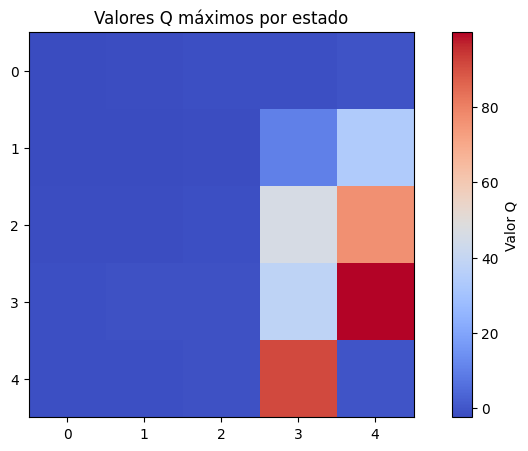

In [4]:
# Imprimir el mejor resultado
print("\nMejor recorrido:")
print(f"Recorrido (episodio): {best_episode}, Pasos: {best_steps}, Recompensa: {best_reward}")

# Visualizar la tabla Q final
plt.figure(figsize=(10, 5))
plt.imshow(np.max(q_table, axis=2), cmap='coolwarm', interpolation='none')
plt.colorbar(label='Valor Q')
plt.title('Valores Q máximos por estado')
plt.show()